In [2]:
import keras

Using TensorFlow backend.


In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

5


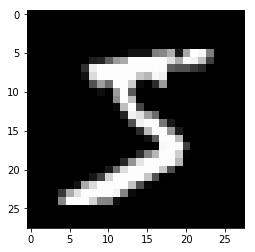

0


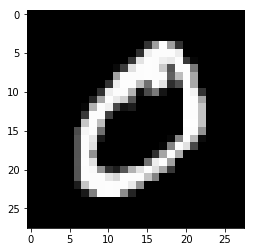

4


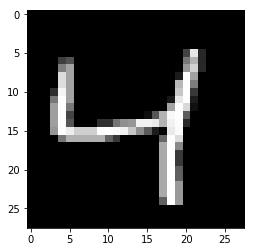

1


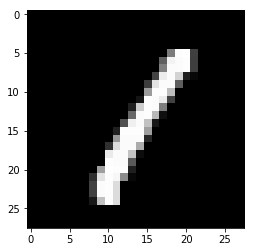

9


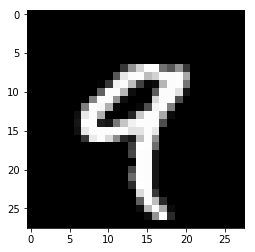

2


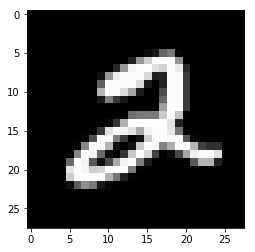

1


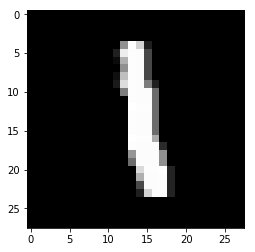

3


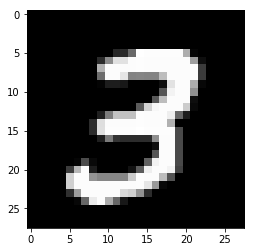

1


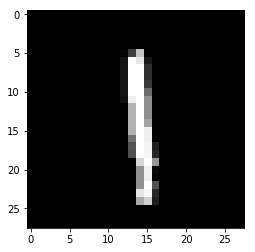

4


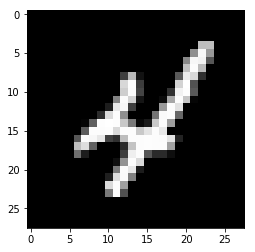

In [6]:
for i in range(10):
    plt.imshow(X_train[i],cmap='gray')
    print(y_train[i])
    plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [9]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

In [12]:
X_train = X_train.astype('float32')

In [13]:
X_test = X_test.astype('float32')

In [14]:
X_train = X_train/255

In [15]:
X_test = X_test/255

In [16]:
from keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train)

In [18]:
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)

In [20]:
y_test[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [29]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [32]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [33]:
filepath="/Users/syedshakeeb/Desktop/savedmodels/weights-mnist.hdf5"

In [34]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [35]:
model_fit = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=15, batch_size=50, callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2173 - acc: 0.9358 - val_loss: 0.0846 - val_acc: 0.9734

Epoch 00001: loss improved from inf to 0.21728, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-mnist.hdf5
Epoch 2/15
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0852 - acc: 0.9735 - val_loss: 0.0653 - val_acc: 0.9784

Epoch 00002: loss improved from 0.21728 to 0.08524, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-mnist.hdf5
Epoch 3/15
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0593 - acc: 0.9816 - val_loss: 0.0579 - val_acc: 0.9826

Epoch 00003: loss improved from 0.08524 to 0.05935, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-mnist.hdf5
Epoch 4/15
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0503 - val_acc: 0.9845

Epoch 00004: loss im

In [74]:
model_fit.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

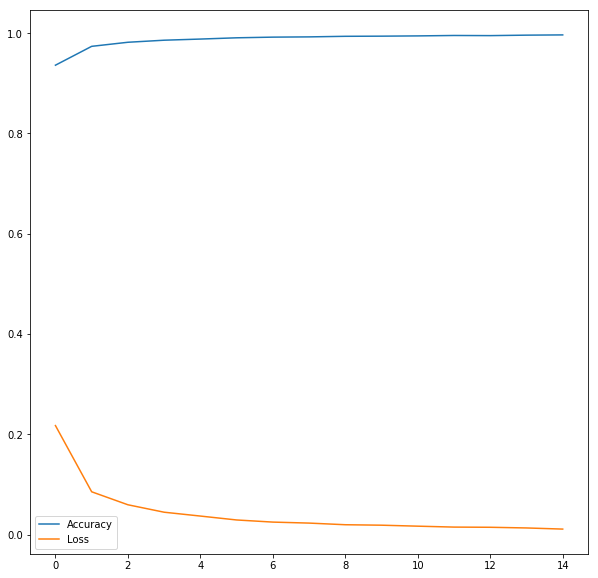

In [96]:
plt.figure(figsize=(10,10))
plt.plot(model_fit.history['acc'])
plt.plot(model_fit.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()

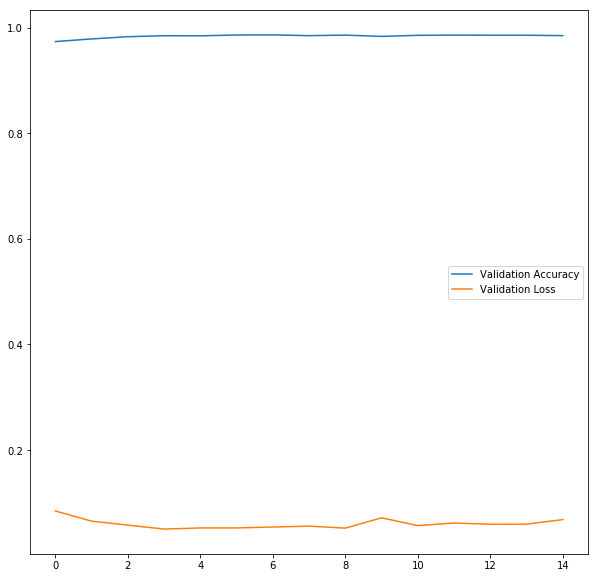

In [95]:
plt.figure(figsize=(10,10))
plt.plot(model_fit.history['val_acc'])
plt.plot(model_fit.history['val_loss'])
plt.legend(['Validation Accuracy','Validation Loss'])
plt.show()

In [94]:
model.evaluate(X_test,y_test)[1] * 100

10000/10000 [==============================] - 12s 1ms/step


98.46000000000001

In [52]:
pred = model.predict(X_test[158].reshape(1,28,28,1))

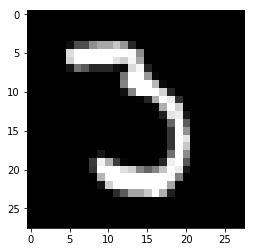

In [62]:
plt.imshow(X_test[158].reshape(28,28),cmap='gray')

In [61]:
pred.argmax()

3